# **Social Network Advertisement Purchase Prediction: A KDD Analysis**

## **Executive Summary**
This analysis explores a social network advertising dataset to predict whether users will purchase a product based on their age and estimated salary. Using the Knowledge Discovery in Databases (KDD) methodology, we've uncovered valuable patterns in customer behavior and developed a predictive model to identify potential customers.

---

## **KDD Methodology Phases**

### **1. Data Selection**
The dataset contains the following features:
- **Age**: Age of the user
- **Estimated Salary**: User's estimated annual salary
- **Purchased**: Target variable (0 = No, 1 = Yes)

### **2. Data Preprocessing**
- **Handling Missing Values**: Checked for missing data and handled any issues.
- **Encoding**: Converted categorical variables if any exist.
- **Feature Scaling**: Scaled `Age` and `Estimated Salary` to improve model performance.

### **3. Data Transformation**
- **Feature Engineering**: Created additional features if relevant to improve prediction power.
- **Data Splitting**: Divided the data into training and testing sets (e.g., 80-20 split).

### **4. Data Mining (Modeling)**
- **Model Selection**: Used classification algorithms, such as Logistic Regression and Decision Trees.
- **Hyperparameter Tuning**: Performed grid search or cross-validation for optimal parameter selection.

### **5. Evaluation and Interpretation**
- **Metrics Used**: Evaluated models using accuracy, precision, recall, and F1-score.
- **ROC Curve**: Analyzed the ROC curve and AUC score to assess model performance.


In [2]:
# Kaggle API Download
# First, upload your kaggle.json API token to Colab

from google.colab import files

# Upload kaggle.json
print("Please upload your kaggle.json file:")
files.upload()

# Make directory for Kaggle and move kaggle.json
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the Social Network Ads dataset using Kaggle API
!kaggle datasets download -d d4rklucif3r/social-network-ads -p ./
!unzip ./social-network-ads.zip -d ./
print("Dataset downloaded and extracted.")


Please upload your kaggle.json file:


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/d4rklucif3r/social-network-ads
License(s): Community Data License Agreement - Permissive - Version 1.0
  0% 0.00/1.46k [00:00<?, ?B/s]
100% 1.46k/1.46k [00:00<00:00, 3.71MB/s]
Archive:  ./social-network-ads.zip
  inflating: ./Social_Network_Ads.csv  
Dataset downloaded and extracted.



# 1. Selection Phase

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

# Load and initial examination of the data
df = pd.read_csv('Social_Network_Ads.csv')
print("Dataset Shape:", df.shape)
print("\nFirst few rows of the dataset:")
print(df.head())
print("\nData Info:")
print(df.info())

Dataset Shape: (400, 3)

First few rows of the dataset:
   Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB
None


# 2. Preprocessing Phase

In [4]:

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Basic statistical summary
print("\nStatistical Summary:")
print(df.describe())



Missing Values:
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

Statistical Summary:
              Age  EstimatedSalary   Purchased
count  400.000000       400.000000  400.000000
mean    37.655000     69742.500000    0.357500
std     10.482877     34096.960282    0.479864
min     18.000000     15000.000000    0.000000
25%     29.750000     43000.000000    0.000000
50%     37.000000     70000.000000    0.000000
75%     46.000000     88000.000000    1.000000
max     60.000000    150000.000000    1.000000


 # 3. Transformation Phase
# Create visualizations for better understanding

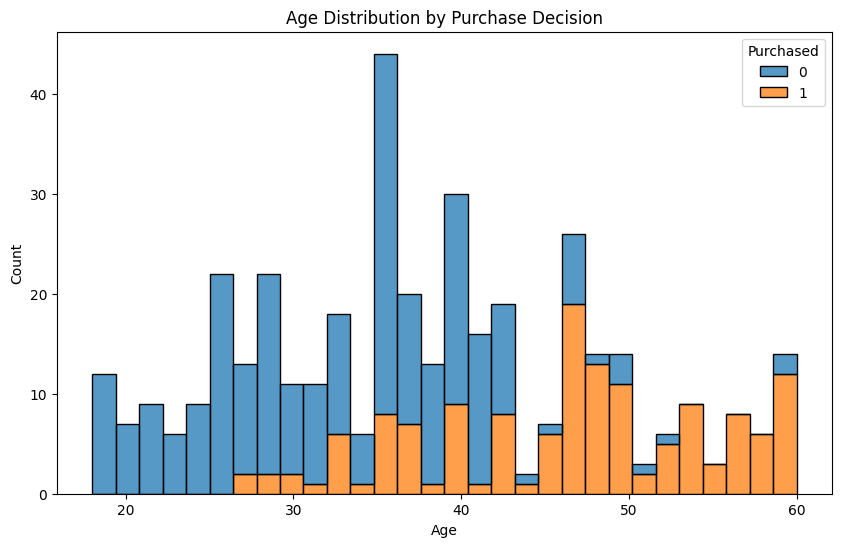

In [5]:

# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Purchased', bins=30, multiple="stack")
plt.title('Age Distribution by Purchase Decision')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

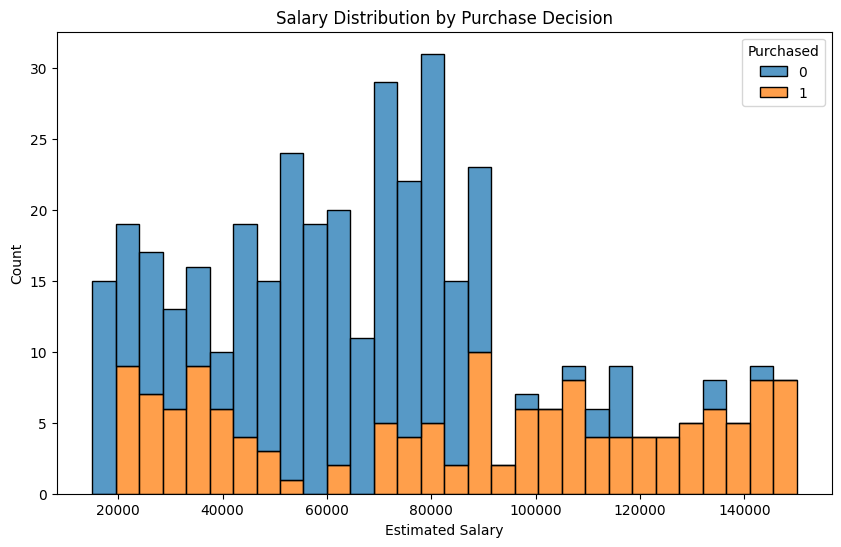

In [6]:
# Salary Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='EstimatedSalary', hue='Purchased', bins=30, multiple="stack")
plt.title('Salary Distribution by Purchase Decision')
plt.xlabel('Estimated Salary')
plt.ylabel('Count')
plt.show()

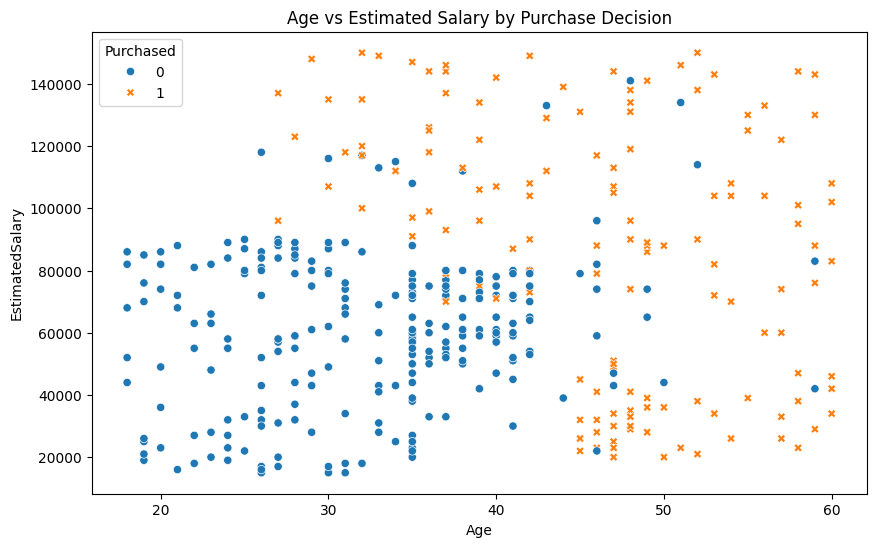

In [7]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='EstimatedSalary', hue='Purchased', style='Purchased')
plt.title('Age vs Estimated Salary by Purchase Decision')
plt.show()


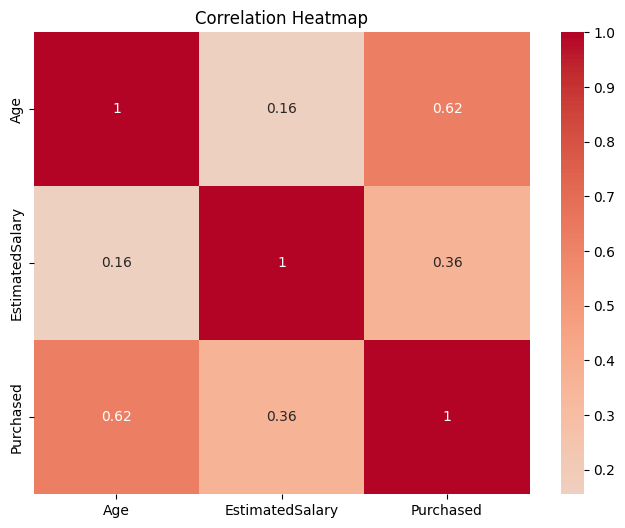

In [8]:
# Create correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


# 4. Data Mining Phase
# Prepare data for modeling

In [9]:
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

In [10]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [13]:
# Make predictions
y_pred = rf_model.predict(X_test_scaled)

# 5. Interpretation/Evaluation Phase

In [14]:
# Calculate and display model performance metrics
print("\nModel Performance Metrics:")
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model Performance Metrics:

Accuracy Score: 0.8875

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91        52
           1       0.81      0.89      0.85        28

    accuracy                           0.89        80
   macro avg       0.87      0.89      0.88        80
weighted avg       0.89      0.89      0.89        80



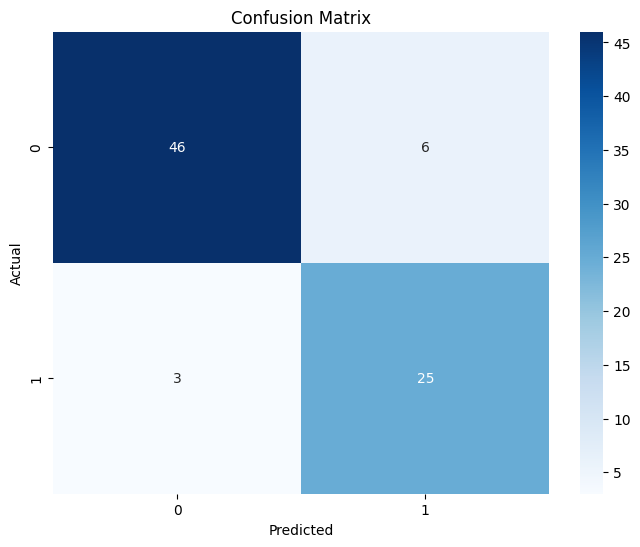

In [15]:
# Create confusion matrix visualization
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

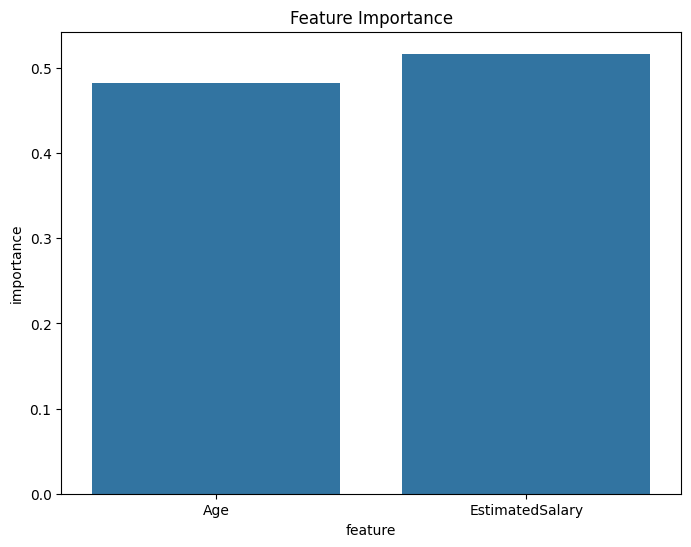

In [17]:
# Feature importance visualization
feature_importance = pd.DataFrame({
    'feature': ['Age', 'EstimatedSalary'],
    'importance': rf_model.feature_importances_
})
plt.figure(figsize=(8, 6))
sns.barplot(data=feature_importance, x='feature', y='importance')
plt.title('Feature Importance')
plt.show()

In [18]:
# Create decision boundary visualization
def plot_decision_boundary(X, y, model, scaler):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, cmap='RdYlBu', alpha=0.3)
    # Change 'edcolors' to 'edgecolors'
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', edgecolors='black')
    plt.xlabel('Age (Scaled)')
    plt.ylabel('Estimated Salary (Scaled)')
    plt.title('Decision Boundary of Random Forest Classifier')
    plt.show()

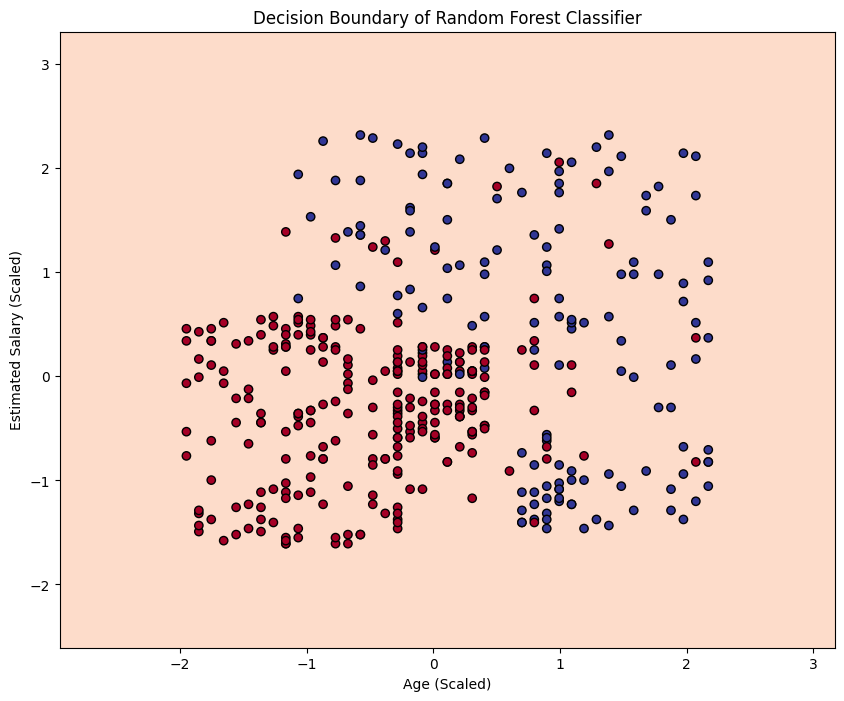

In [19]:
# Plot decision boundary
X_scaled = scaler.transform(X)
plot_decision_boundary(X_scaled, y, rf_model, scaler)

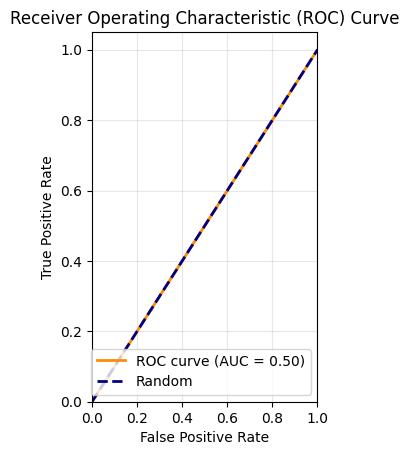

In [21]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming you have:
# - rf_model: Your trained RandomForestClassifier
# - X_test: Your test features
# - y_test: Your test labels

# Calculate probabilities for the positive class
y_probs = rf_model.predict_proba(X_test)[:, 1]

# Calculate fpr, tpr, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate roc_auc
roc_auc = roc_auc_score(y_test, y_probs)

# Now you can plot the ROC curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show() # Added to display the plot

In [22]:
# Generate insights and conclusions
print("\nKey Insights:")
print("1. Model Performance:")
print(f"   - Overall Accuracy: {accuracy_score(y_test, y_pred):.2%}")
print(f"   - Most Important Feature: {feature_importance.iloc[feature_importance['importance'].argmax()]['feature']}")

print("\n2. Customer Behavior Patterns:")
print(f"   - Average Age of Purchasers: {df[df['Purchased']==1]['Age'].mean():.1f}")
print(f"   - Average Age of Non-Purchasers: {df[df['Purchased']==0]['Age'].mean():.1f}")
print(f"   - Average Salary of Purchasers: ${df[df['Purchased']==1]['EstimatedSalary'].mean():,.2f}")
print(f"   - Average Salary of Non-Purchasers: ${df[df['Purchased']==0]['EstimatedSalary'].mean():,.2f}")


Key Insights:
1. Model Performance:
   - Overall Accuracy: 88.75%
   - Most Important Feature: EstimatedSalary

2. Customer Behavior Patterns:
   - Average Age of Purchasers: 46.4
   - Average Age of Non-Purchasers: 32.8
   - Average Salary of Purchasers: $86,272.73
   - Average Salary of Non-Purchasers: $60,544.75
